# **Dicoding Project Sentiment Analysis For NLP - APK PlayStore PUBG Mobile**

- Nama : Muhammad Fauzan Ariyatmoko
- ID_Dicoding (user) : muhammad_fauzan_a
- Kelas : Belajar Pengembangan Machine Learning (Proyek Pertama)

# **Import Library**

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Loading Dataset**

In [3]:
data = pd.read_csv('/content/ulasan_pubg.csv')

### **Reviewing Data from Scrapping Results**

In [4]:
app_reviews_df = pd.DataFrame(data)
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [5]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,34ff4c9f-bd29-4554-a652-3e1f1963ae69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bug setelah update. 1 . Turun pesawat ga kebag...,2,3,0.12.0,2019-04-20 03:46:42,NaN,NaN,0.12.0
1,e0f2bf54-5404-4678-a0d0-da0a8d153e55,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pubg setelah update bnyak aja masalahnya, sepe...",2,2,0.13.0,2020-09-08 11:23:56,"Hai, kami menyesal mendengar Anda mengalami ba...",2020-09-10 01:35:53,0.13.0
2,2c23b298-46ed-4ef5-8d2d-2c3a5a6e57e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak ada masalah pada sinyal/pun device. Tapi...,1,3,1.8.0,2022-02-23 09:00:31,"Halo iza, terima kasih atas tanggapannya menge...",2022-02-24 14:47:03,1.8.0
3,6fce1800-fe7e-4601-9477-2fc23017e805,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Update file gajah terooos,tapi bug mic,sound m...",1,0,0.16.0,2020-03-04 23:20:09,NaN,NaN,0.16.0
4,d502a0cb-addc-47aa-b4a5-578cab37dd2a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Game ini bagus banget ada grafik nya ada shade...,4,4,3.4.0,2024-10-19 06:21:57,NaN,NaN,3.4.0


In [6]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99000 entries, 0 to 98999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              99000 non-null  object
 1   userName              99000 non-null  object
 2   userImage             99000 non-null  object
 3   content               99000 non-null  object
 4   score                 99000 non-null  int64 
 5   thumbsUpCount         99000 non-null  int64 
 6   reviewCreatedVersion  68403 non-null  object
 7   at                    99000 non-null  object
 8   replyContent          34420 non-null  object
 9   repliedAt             34420 non-null  object
 10  appVersion            68403 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.3+ MB


# **Cleaning Data Scrapping From Null and Duplicates in Data**

In [7]:
clean_df = app_reviews_df.dropna()

In [8]:
clean_df = clean_df.drop_duplicates()

jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

### **Checking clean_df**

In [9]:
clean_df.duplicated().sum()

0

In [10]:
print(clean_df.isnull().sum())

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64


# **Preprocessing Data**

In [11]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)


    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
slangwords = {"Sy": "saya", "tlonglah": "tolong lah", "tlong": "tolong","@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [13]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1,e0f2bf54-5404-4678-a0d0-da0a8d153e55,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pubg setelah update bnyak aja masalahnya, sepe...",2,2,0.13.0,2020-09-08 11:23:56,"Hai, kami menyesal mendengar Anda mengalami ba...",2020-09-10 01:35:53,0.13.0
2,2c23b298-46ed-4ef5-8d2d-2c3a5a6e57e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak ada masalah pada sinyal/pun device. Tapi...,1,3,1.8.0,2022-02-23 09:00:31,"Halo iza, terima kasih atas tanggapannya menge...",2022-02-24 14:47:03,1.8.0
5,f9692f28-d2d1-4782-9f48-e0f324285eb7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game nya keren grafik nya hd dan smooth untuk ...,3,6,3.4.0,2024-10-19 12:48:08,"Halo pemain,\nKami memahami perasaan Anda. Jik...",2024-10-22 01:31:28,3.4.0
7,2777434c-c6c1-4925-b079-1a7f515d508f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dari pada event kemarin(di laut). Event vampir...,1,279,3.4.0,2024-09-25 14:12:13,"Halo pemain,\nKami memahami perasaan Anda. Jik...",2024-09-26 03:39:14,3.4.0
9,f2f7b096-a2f4-4817-b9ec-00257f7c67d3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bukannya bagus malah jadi buruk optimasinya, s...",1,151,3.4.0,2024-10-17 06:18:22,Yang terhormat pemain! Kami menyarankan Anda u...,2024-10-17 07:12:17,3.4.0
...,...,...,...,...,...,...,...,...,...,...,...
98984,ba757aee-4727-4572-abe4-b8ae81a8b198,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"BYE GUE SEGENAP SEASON 2 MENGUCAPKAN THANKYOU,...",1,0,0.16.0,2020-11-14 22:58:31,"Halo, kami mohon maaf jika Anda mengalami masa...",2020-11-19 03:18:02,0.16.0
98985,e4fee591-86ce-42c9-8ac8-0561aa570c7d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kenapa setelah update,,garfik smooth extreme d...",3,0,1.2.0,2021-01-25 02:31:57,"Halo, kami menyesal mendengar Anda mengalami m...",2021-01-26 08:25:16,1.2.0
98986,2e044622-7184-43c3-8a1c-6279288a9c08,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kenapa gak bisa masuk, di suruh download di pl...",1,0,1.5.0,2021-11-15 13:48:14,"Halo Prajurit, kami mohon maaf mendengar bahwa...",2021-11-16 03:25:53,1.5.0
98987,88949676-47ff-40b0-b1cd-63768ce52a1e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sudah bagus si sebenarnya Kenapa pas lagi main...,5,0,2.3.0,2022-12-26 13:20:31,"Halo Erik, kami mohon maaf, apakah perangkat A...",2022-12-27 08:10:06,2.3.0


In [14]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [15]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
1,e0f2bf54-5404-4678-a0d0-da0a8d153e55,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pubg setelah update bnyak aja masalahnya, sepe...",2,2,0.13.0,2020-09-08 11:23:56,"Hai, kami menyesal mendengar Anda mengalami ba...",2020-09-10 01:35:53,0.13.0,Pubg setelah update bnyak aja masalahnya seper...,pubg setelah update bnyak aja masalahnya seper...,pubg setelah update bnyak saja masalahnya sepe...,"[pubg, setelah, update, bnyak, saja, masalahny...","[pubg, update, bnyak, bug, map, pas, game, pla...",pubg update bnyak bug map pas game player suka...
2,2c23b298-46ed-4ef5-8d2d-2c3a5a6e57e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak ada masalah pada sinyal/pun device. Tapi...,1,3,1.8.0,2022-02-23 09:00:31,"Halo iza, terima kasih atas tanggapannya menge...",2022-02-24 14:47:03,1.8.0,Tidak ada masalah pada sinyalpun device Tapi k...,tidak ada masalah pada sinyalpun device tapi k...,tidak ada masalah pada sinyalpun device tapi k...,"[tidak, ada, masalah, pada, sinyalpun, device,...","[sinyalpun, device, bermain, dimode, jujutsu, ...",sinyalpun device bermain dimode jujutsu kaisen...
5,f9692f28-d2d1-4782-9f48-e0f324285eb7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game nya keren grafik nya hd dan smooth untuk ...,3,6,3.4.0,2024-10-19 12:48:08,"Halo pemain,\nKami memahami perasaan Anda. Jik...",2024-10-22 01:31:28,3.4.0,game nya keren grafik nya hd dan smooth untuk ...,game nya keren grafik nya hd dan smooth untuk ...,game nya keren grafik nya hd dan smooth untuk ...,"[game, nya, keren, grafik, nya, hd, dan, smoot...","[game, keren, grafik, hd, smooth, game, play, ...",game keren grafik hd smooth game play bagus ba...
7,2777434c-c6c1-4925-b079-1a7f515d508f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dari pada event kemarin(di laut). Event vampir...,1,279,3.4.0,2024-09-25 14:12:13,"Halo pemain,\nKami memahami perasaan Anda. Jik...",2024-09-26 03:39:14,3.4.0,Dari pada event kemarindi laut Event vampire i...,dari pada event kemarindi laut event vampire i...,dari pada event kemarindi laut event vampire i...,"[dari, pada, event, kemarindi, laut, event, va...","[event, kemarindi, laut, event, vampire, berat...",event kemarindi laut event vampire berat bange...
9,f2f7b096-a2f4-4817-b9ec-00257f7c67d3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bukannya bagus malah jadi buruk optimasinya, s...",1,151,3.4.0,2024-10-17 06:18:22,Yang terhormat pemain! Kami menyarankan Anda u...,2024-10-17 07:12:17,3.4.0,Bukannya bagus malah jadi buruk optimasinya se...,bukannya bagus malah jadi buruk optimasinya se...,bukannya bagus bahkan jadi buruk optimasinya s...,"[bukannya, bagus, bahkan, jadi, buruk, optimas...","[bagus, buruk, optimasinya, banget, mengalami,...",bagus buruk optimasinya banget mengalami frame...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98984,ba757aee-4727-4572-abe4-b8ae81a8b198,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"BYE GUE SEGENAP SEASON 2 MENGUCAPKAN THANKYOU,...",1,0,0.16.0,2020-11-14 22:58:31,"Halo, kami mohon maaf jika Anda mengalami masa...",2020-11-19 03:18:02,0.16.0,BYE GUE SEGENAP SEASON MENGUCAPKAN THANKYOU u...,bye gue segenap season mengucapkan thankyou u...,bye saya segenap season mengucapkan thankyou u...,"[bye, saya, segenap, season, mengucapkan, than...","[bye, segenap, season, thankyou, update, ngota...",bye segenap season thankyou update ngotak user...
98985,e4fee591-86ce-42c9-8ac8-0561aa570c7d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kenapa setelah update,,garfik smooth extreme d...",3,0,1.2.0,2021-01-25 02:31:57,"Halo, kami menyesal mendengar Anda mengalami m...",2021-01-26 08:25:16,1.2.0,Kenapa setelah updategarfik smooth 

# **Labeling Words From Clean Data Scrapping Results**

In [16]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [17]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    POSITIVE_THRESHOLD = 1
    NEGATIVE_THRESHOLD = -1

    if score >= POSITIVE_THRESHOLD:
        polarity = 'positive'
    elif score <= NEGATIVE_THRESHOLD:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [18]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    13259
positive     8852
neutral      1961
Name: count, dtype: int64


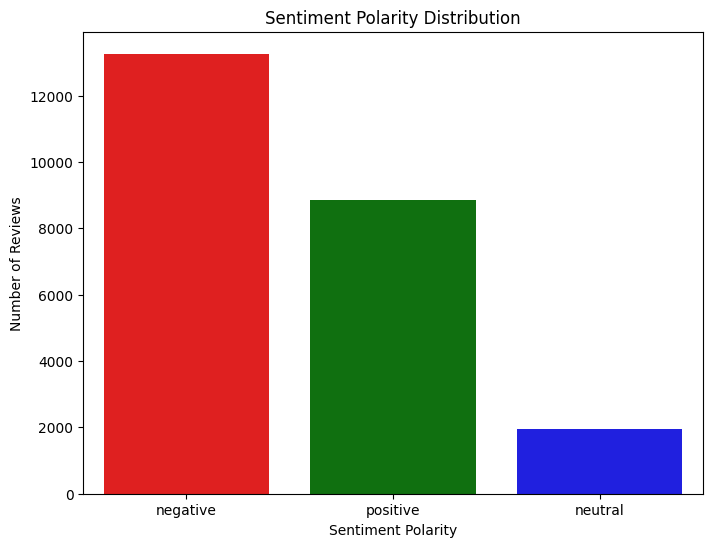

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_df,
              x='polarity',
              hue='polarity',
              palette={'positive': 'green', 'neutral': 'blue', 'negative': 'red'},
              legend=False)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Reviews')
plt.show()

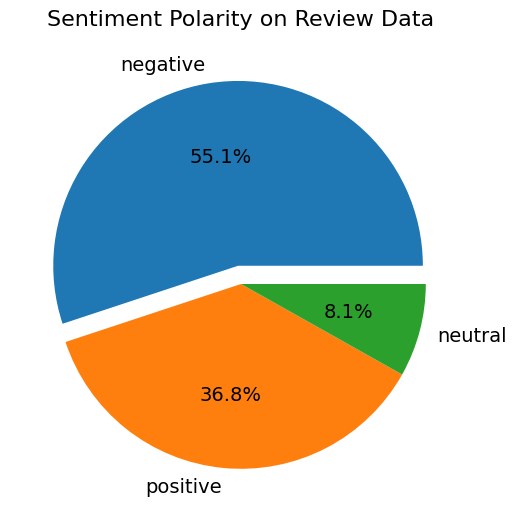

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

## **For Positive Polarity**

In [21]:
pd.set_option('display.max_colwidth', 5000)

positive_tweets = clean_df[clean_df['polarity'] == 'positive']

positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

positive_tweets = positive_tweets.reset_index(drop=True)

positive_tweets.index += 1

## **For Neutral Polarity**

In [22]:
pd.set_option('display.max_colwidth', 5000)

neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)

neutral_tweets = neutral_tweets.reset_index(drop=True)

neutral_tweets.index += 1

## **For Negative Polarity**

In [23]:
pd.set_option('display.max_colwidth', 5000)

negative_tweets = clean_df[clean_df['polarity'] == 'negative']

negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

negative_tweets = negative_tweets[0:10]

negative_tweets = negative_tweets.reset_index(drop=True)

negative_tweets.index += 1

# **Creating WordCloud After Preprocessing Step**

### WordCloud General

In [24]:
list_words = ''
for tweet in neutral_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

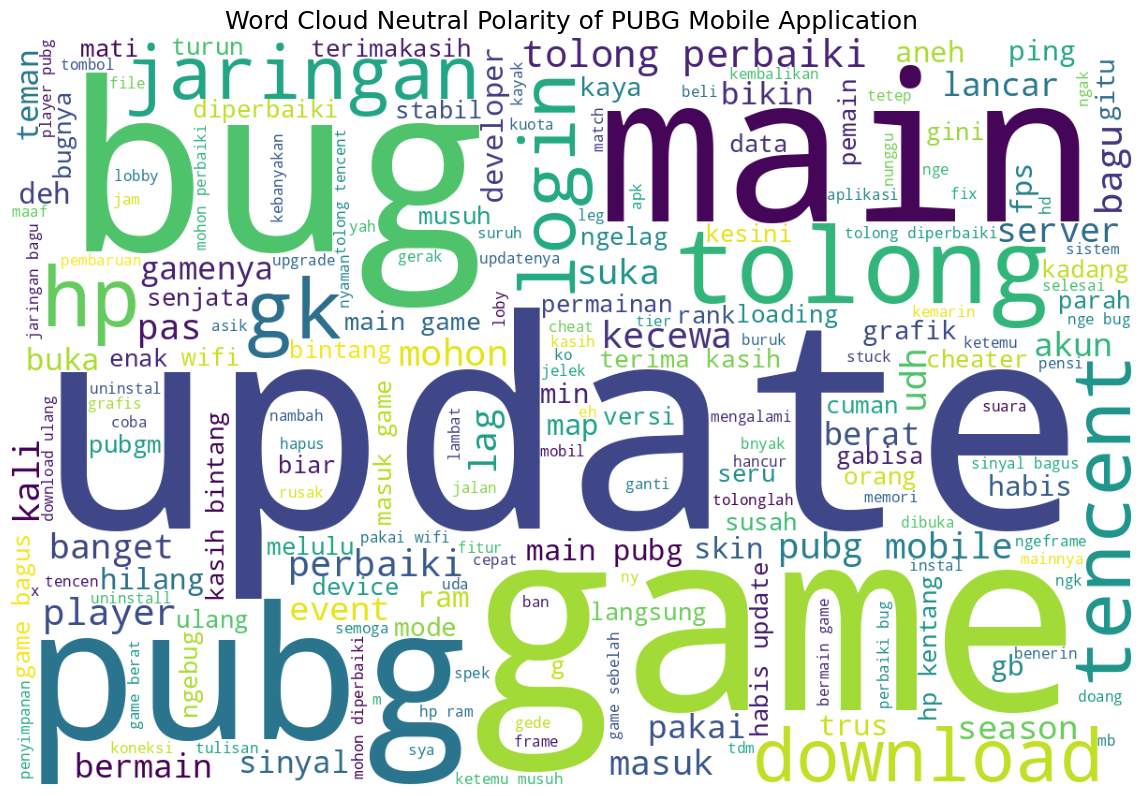

In [25]:
wordcloud = WordCloud(width=1200, height=800, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Word Cloud Neutral Polarity of PUBG Mobile Application', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

### WordCloud Negative Polarity

In [26]:
list_words = ''
for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

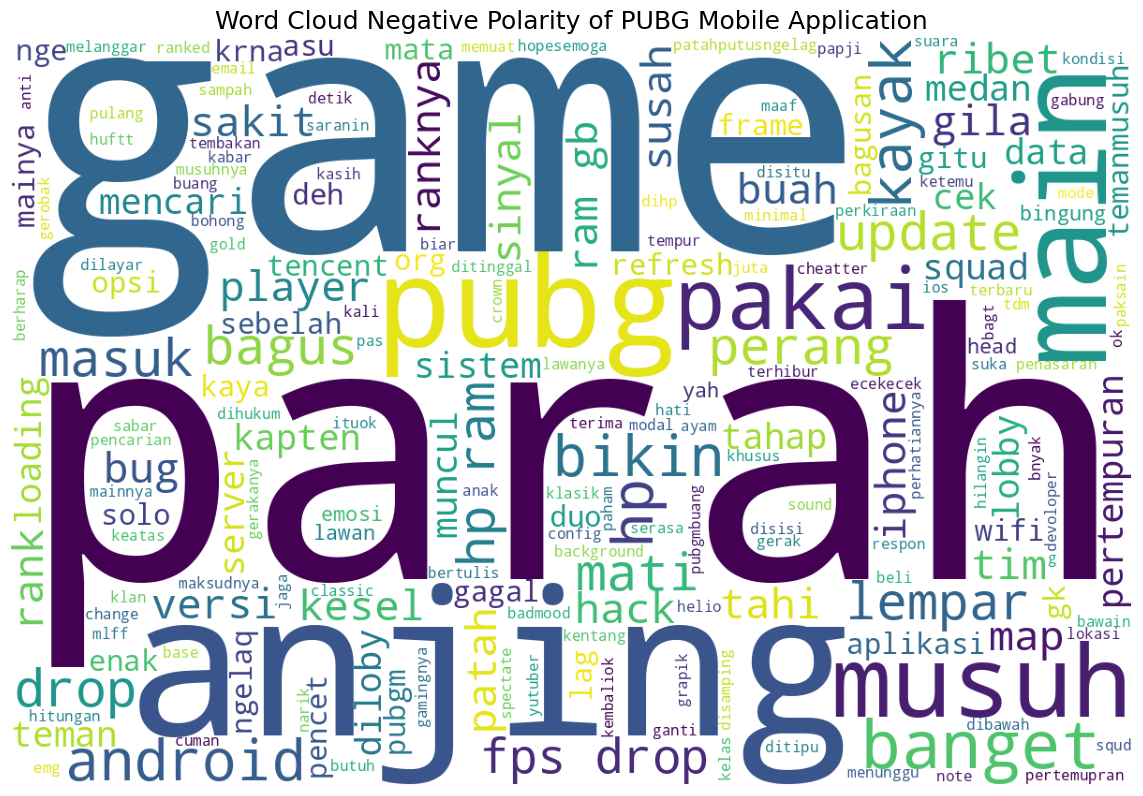

In [27]:
wordcloud = WordCloud(width=1200, height=800, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Word Cloud Negative Polarity of PUBG Mobile Application', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

### WordCloud Positive Polarity

In [28]:
list_words = ''
for tweet in positive_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

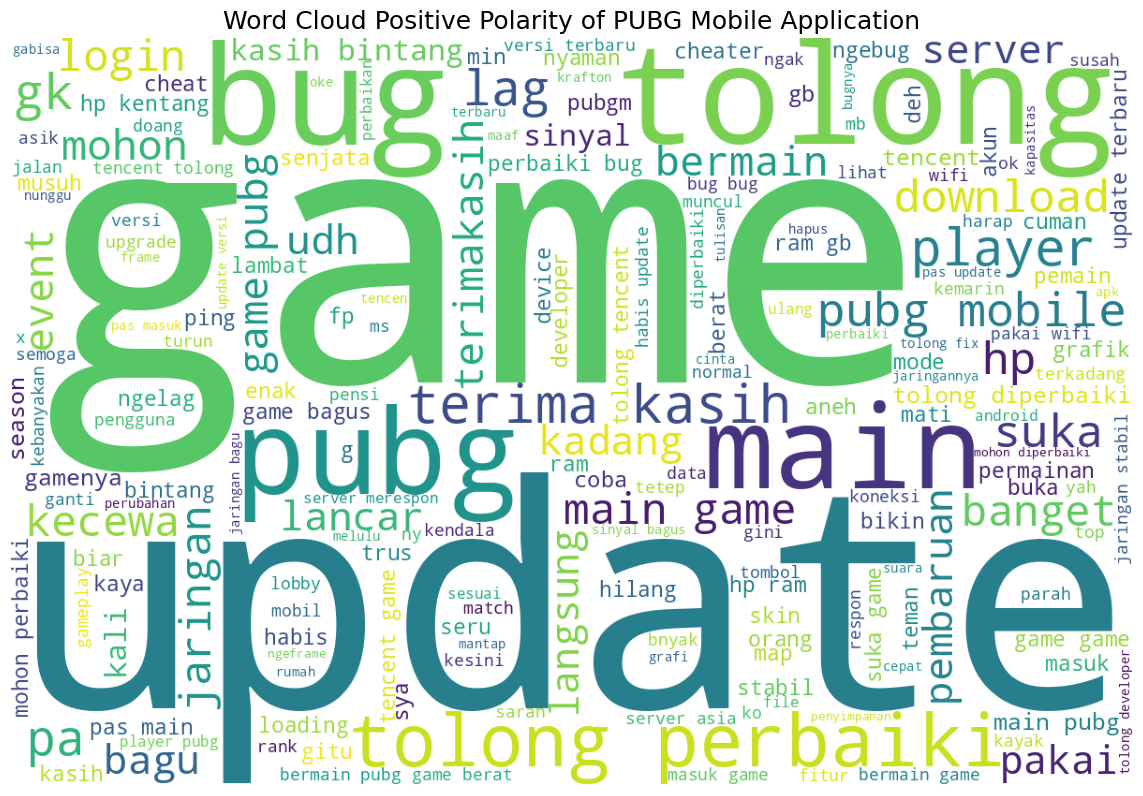

In [29]:
wordcloud = WordCloud(width=1200, height=800, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Word Cloud Positive Polarity of PUBG Mobile Application', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

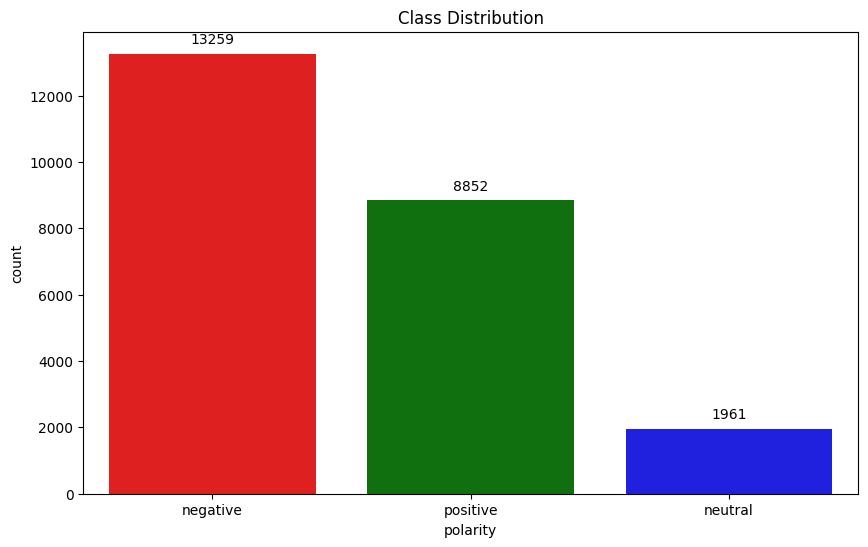

In [31]:
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df, hue='polarity',
              palette={'positive': 'green', 'neutral': 'blue', 'negative': 'red'},
              legend=False)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

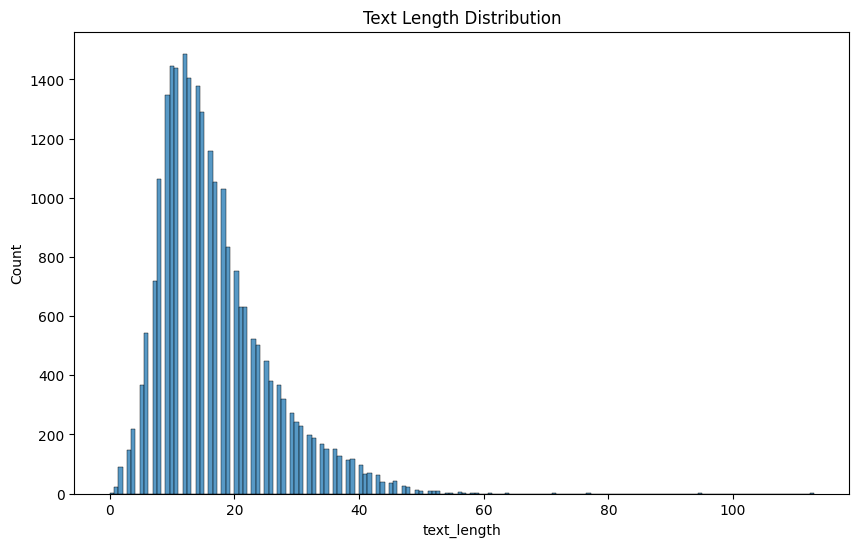

In [32]:
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

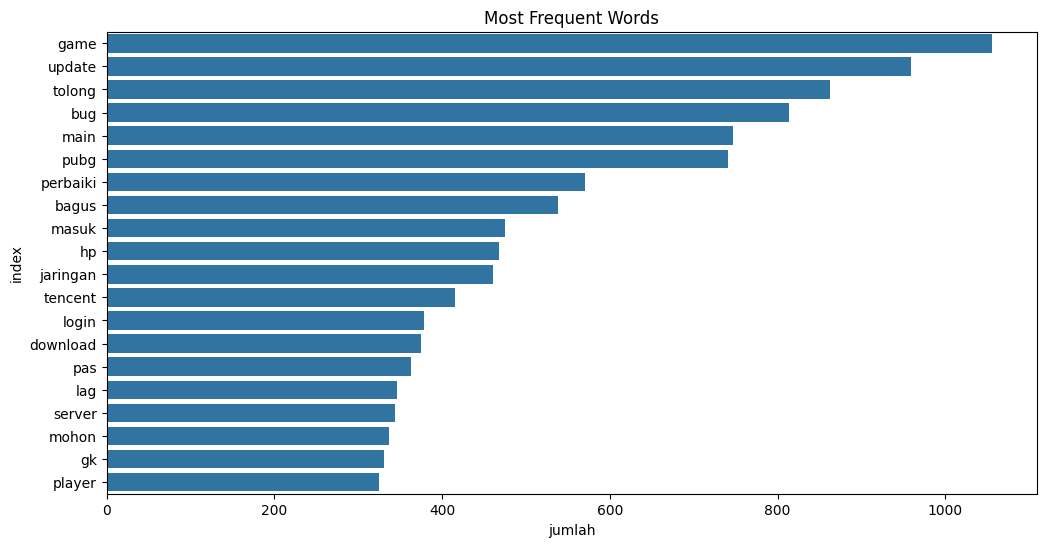

In [33]:
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [34]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
1,e0f2bf54-5404-4678-a0d0-da0a8d153e55,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Pubg setelah update bnyak aja masalahnya, seperti bug di map dan pas di game player suka kembali ke tempat awal pdahal dia udh jalan dan ketemu musuh. Dan itu yg terjadi sama saya, saat lg close combat sama musuh. Saya seperti balik ke tempat awal dan malah saya yg mati, pdahal sy sudah muterin itu musuh. Ya seperti itu aja tencent keluhannya, Tolong diperbaiki biar player2 jg ga merasakan hal yg sama . Thanks",2,2,0.13.0,2020-09-08 11:23:56,"Hai, kami menyesal mendengar Anda mengalami banyak bugs saat bermain PUBG Mobile. Silahkan hubungi kami melalui pesan dukungan pelanggan dalam game. Kami akan berusaha untuk mengatasi masalah Anda. Terima kasih.",2020-09-10 01:35:53,0.13.0,Pubg setelah update bnyak aja masalahnya seperti bug di map dan pas di game player suka kembali ke tempat awal pdahal dia udh jalan dan ketemu musuh Dan itu yg terjadi sama saya saat lg close combat sama musuh Saya seperti balik ke tempat awal dan malah saya yg mati pdahal sy sudah muterin itu musuh Ya seperti itu aja tencent keluhannya Tolong diperbaiki biar player jg ga merasakan hal yg sama Thanks,pubg setelah update bnyak aja masalahnya seperti bug di map dan pas di game player suka kembali ke tempat awal pdahal dia udh jalan dan ketemu musuh dan itu yg terjadi sama saya saat lg close combat sama musuh saya seperti balik ke tempat awal dan malah saya yg mati pdahal sy sudah muterin itu musuh ya seperti itu aja tencent keluhannya tolong diperbaiki biar player jg ga merasakan hal yg sama thanks,pubg setelah update bnyak saja masalahnya seperti bug di map dan pas di game player suka kembali ke tempat awal pdahal dia udh jalan dan ketemu musuh dan itu yang terjadi sama saya saat lagi close combat sama musuh saya seperti balik ke tempat awal dan bahkan saya yang mati pdahal saya sudah muterin itu musuh iya seperti itu saja tencent keluhannya tolong diperbaiki biar player juga ga merasakan hal yang sama terima kasih,"[pubg, setelah, update, bnyak, saja, masalahnya, seperti, bug, di, map, dan, pas, di, game, player, suka, kembali, ke, tempat, awal, pdahal, dia, udh, jalan, dan, ketemu, musuh, dan, itu, yang, terjadi, sama, saya, saat, lagi, close, combat, sama, musuh, saya, seperti, balik, ke, tempat, awal, dan, bahkan, saya, yang, mati, pdahal, saya, sudah, muterin, itu, musuh, iya, seperti, itu, saja, tencent, keluhannya, tolong, diperbaiki, biar, player, juga, ga, merasakan, hal, yang, sama, terima, kasih]","[pubg, update, bnyak, bug, map, pas, game, player, suka, pdahal, udh, jalan, ketemu, musuh, close, combat, musuh, mati, pdahal, muterin, musuh, tencent, keluhannya, tolong, diperbaiki, biar, player, merasakan, terima, kasih]",pubg update bnyak bug map pas game player suka pdahal udh jalan ketemu musuh close combat musuh mati pdahal muterin musuh tencent keluhannya tolong diperbaiki biar player merasakan terima kasih,-5,negative,30
2,2c23b298-46ed-4ef5-8d2d-2c3a5a6e57e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Tidak ada masalah pada sinyal/pun device. Tapi kenapa ketika bermain dimode jujutsu kaisen setelah direcall oleh teman malah sering kali bug. Tidak dapat buka pintu, melompat, dan tak diketahui posisi karakter dimana. Mohon segera diperbaiki, karna sangat mengganggu didalam permainan. Tiba2 mati tanpa diketahui penyebabnya karna bug. Report pun sering kali ditujukan tapi ternyata tak ada respon langsung in-game. Dan ketika spectator selalu bug karakter ceket, report berkali2 pun tak ada respon",1,3,1.8.0,2022-02-23 09:00:31,"Halo iza, t

In [35]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
X = clean_df['text_akhir']
y = clean_df['polarity']

In [97]:
tfidf = TfidfVectorizer(max_features=5000, min_df=18, max_df=0.9)
X_tfidf = tfidf.fit_transform(clean_df['text_akhir'])
X_tfidf_array = X_tfidf.toarray()

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_array, y, test_size=0.3, random_state=42)

In [99]:
from tensorflow.keras.activations import relu6
from tensorflow.keras.activations import softplus
from tensorflow.keras.activations import softmax

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

model = keras.Sequential([
    keras.layers.Dense(256, activation='softmax', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu6'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.03)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='softplus'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 256)                 │         478,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 585,859 (2.23 MB)

 Trainable params: 585,859 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.87):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [102]:
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[callbacks])
loss, accuracy = model.evaluate(X_test, y_test_encoded)

Epoch 1/100
422/422 - 13s - 32ms/step - accuracy: 0.5079 - loss: 0.9951 - val_accuracy: 0.5522 - val_loss: 0.9041
Epoch 2/100
422/422 - 10s - 23ms/step - accuracy: 0.5470 - loss: 0.9161 - val_accuracy: 0.5522 - val_loss: 0.9058
Epoch 3/100
422/422 - 2s - 5ms/step - accuracy: 0.5499 - loss: 0.9167 - val_accuracy: 0.5522 - val_loss: 0.9074
Epoch 4/100
422/422 - 1s - 3ms/step - accuracy: 0.5898 - loss: 0.8510 - val_accuracy: 0.7688 - val_loss: 0.5822
Epoch 5/100
422/422 - 1s - 3ms/step - accuracy: 0.8107 - loss: 0.5197 - val_accuracy: 0.8297 - val_loss: 0.4449
Epoch 6/100
422/422 - 1s - 3ms/step - accuracy: 0.8515 - loss: 0.4053 - val_accuracy: 0.8421 - val_loss: 0.4022
Epoch 7/100
422/422 - 1s - 3ms/step - accuracy: 0.8675 - loss: 0.3573 - val_accuracy: 0.8493 - val_loss: 0.3877
Epoch 8/100
422/422 - 1s - 2ms/step - accuracy: 0.8797 - loss: 0.3242 - val_accuracy: 0.8451 - val_loss: 0.4404
Epoch 9/100
422/422 - 1s - 3ms/step - accuracy: 0.8849 - loss: 0.3090 - val_accuracy: 0.8501 - val_l

In [103]:
print(f"Test Accuracy: {accuracy}")
_, train_accuracy = model.evaluate(X_train, y_train_encoded)
print(f"Train Accuracy: {train_accuracy}")

Test Accuracy: 0.863888144493103
527/527 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9632 - loss: 0.1487
Train Accuracy: 0.9448071122169495


In [104]:
from sklearn.metrics import classification_report

y_pred_test_nn = np.argmax(model.predict(X_test), axis=1)
y_test_nn = np.argmax(y_test_encoded, axis=1)

print("\nDetailed Classification Report for Neural Network:")
print(classification_report(y_test_nn, y_pred_test_nn))

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Detailed Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3973
           1       0.42      0.48      0.44       535
           2       0.87      0.89      0.88      2714

    accuracy                           0.86      7222
   macro avg       0.74      0.75      0.75      7222
weighted avg       0.87      0.86      0.87      7222



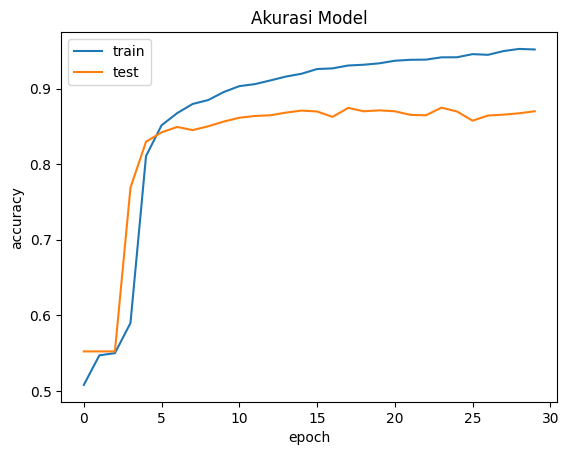

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

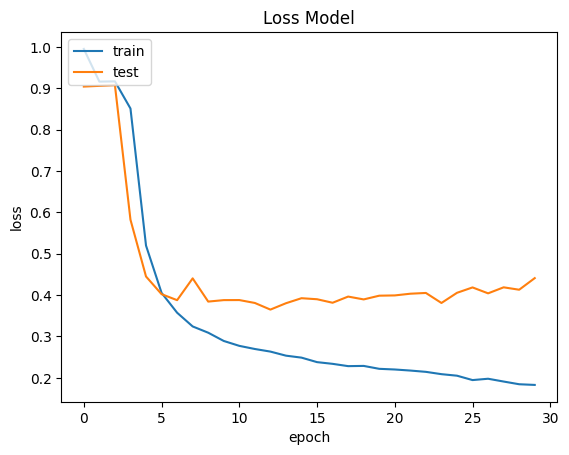

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
model.save('Neural Networks Model.h5')

In [108]:
import scipy.sparse as sp

kalimat_baru = input("Masukkan kalimat baru: ")
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

def predict_sentiment(kalimat_baru):
    X_kalimat_baru = tfidf.transform([kalimat_baru])
    X_kalimat_baru = X_kalimat_baru.toarray()
    prediksi_sentimen = model.predict(X_kalimat_baru)
    predicted_class_index = np.argmax(prediksi_sentimen[0])
    classes = ['negative', 'neutral', 'positive']
    predicted_sentiment = classes[predicted_class_index]
    return predicted_sentiment

predicted_sentiment = predict_sentiment(kalimat_baru)
print(f"Sentimen kalimat baru adalah: {predicted_sentiment}")

Masukkan kalimat baru: game nya gak ngeleg asik
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
Sentimen kalimat baru adalah: positive


In [110]:
import scipy.sparse as sp

kalimat_baru = input("Masukkan kalimat baru: ")
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

def predict_sentiment(kalimat_baru):
    X_kalimat_baru = tfidf.transform([kalimat_baru])
    X_kalimat_baru = X_kalimat_baru.toarray()
    prediksi_sentimen = model.predict(X_kalimat_baru)
    predicted_class_index = np.argmax(prediksi_sentimen[0])
    classes = ['negative', 'neutral', 'positive']
    predicted_sentiment = classes[predicted_class_index]
    return predicted_sentiment

predicted_sentiment = predict_sentiment(kalimat_baru)
print(f"Sentimen kalimat baru adalah: {predicted_sentiment}")

Masukkan kalimat baru: susah gamenya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentimen kalimat baru adalah: negative


In [114]:
import scipy.sparse as sp

kalimat_baru = input("Masukkan kalimat baru: ")
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

def predict_sentiment(kalimat_baru):
    X_kalimat_baru = tfidf.transform([kalimat_baru])
    X_kalimat_baru = X_kalimat_baru.toarray()
    prediksi_sentimen = model.predict(X_kalimat_baru)
    predicted_class_index = np.argmax(prediksi_sentimen[0])
    classes = ['negative', 'neutral', 'positive']
    predicted_sentiment = classes[predicted_class_index]
    return predicted_sentiment

predicted_sentiment = predict_sentiment(kalimat_baru)
print(f"Sentimen kalimat baru adalah: {predicted_sentiment}")

Masukkan kalimat baru: udah terus?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sentimen kalimat baru adalah: neutral
